# Logistic Regression with python 

### We will be working with Kaggle Dataset, this dataset is cleaned version of real Titanic Dataset

In [53]:
# Let us start by importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [54]:
# Let us import the dataset
train = pd.read_csv('titanic_train.csv')

In [55]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
# We can see that we have some missing values. Let us plot the data to see the disstribution of Missing values.
# We will do it by Heatmap

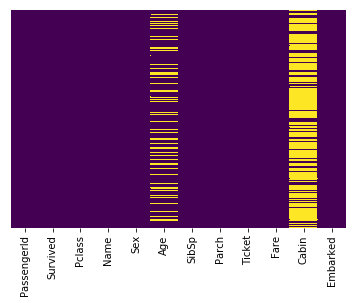

In [58]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False, cmap='viridis')

### We have lot of missing values in Cabin, here we can go for two options 1. Dop it 2. Create a new feature with y/n for Cabin values. The age values nees to be imputed by the mean. 

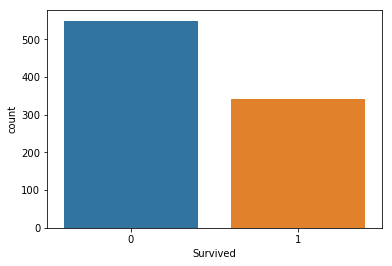

In [59]:
# Let us plot th e surviving data set 
sns.countplot(x='Survived', data=train)

### More people Died than survived. Let us explore the surviving data with other factors

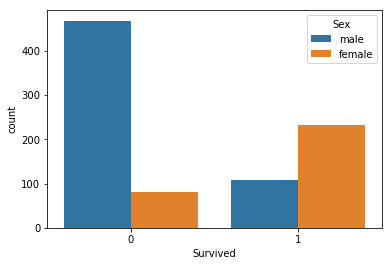

In [60]:
sns.countplot(x='Survived',data=train,hue='Sex')

#### Now this relates to the movie. Children and women on the boat first. Here we are only watching the women part, later we will create a feature to calculate the children feature as well.

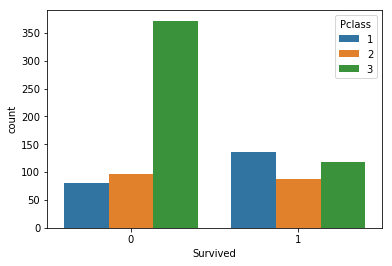

In [61]:
sns.countplot(x='Survived', data=train, hue='Pclass')

The 3rd class people were the most in not surviving 

#### Its time to explore other parameters

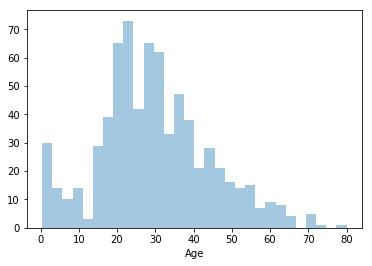

In [62]:
# Distribution of Age
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

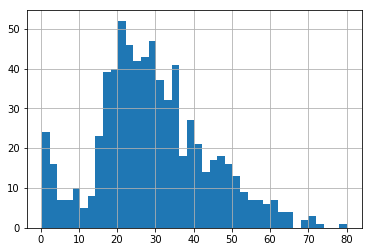

In [63]:
train['Age'].hist(bins=40)

The mode of age lie in 20 or 22

Now let us see it for Sibsp

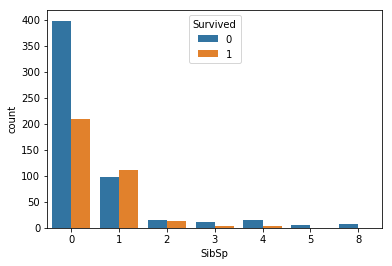

In [64]:
sns.countplot(x='SibSp', data=train, hue='Survived')

People with 1 Sibling Survived more, than the people with no Sib. Let us rotate it out

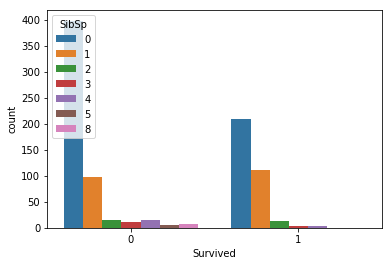

In [65]:
sns.countplot(x='Survived', data=train, hue='SibSp')

Now it is clear that in surviving we have more people which are at 0 

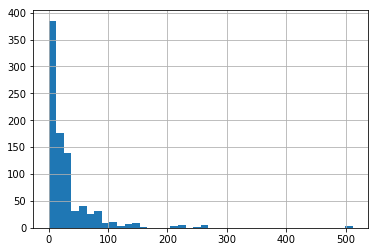

In [66]:
# Let us see the distribution of Fare
train['Fare'].hist(bins=40)

## Now we need to clean the Data

We need to fill the data of Age. One way to drop the whole age and thats not possible. Other way to fill the data with average, but with just the average we cannot make goo imputation so we will the other parameter like pclass for imputation

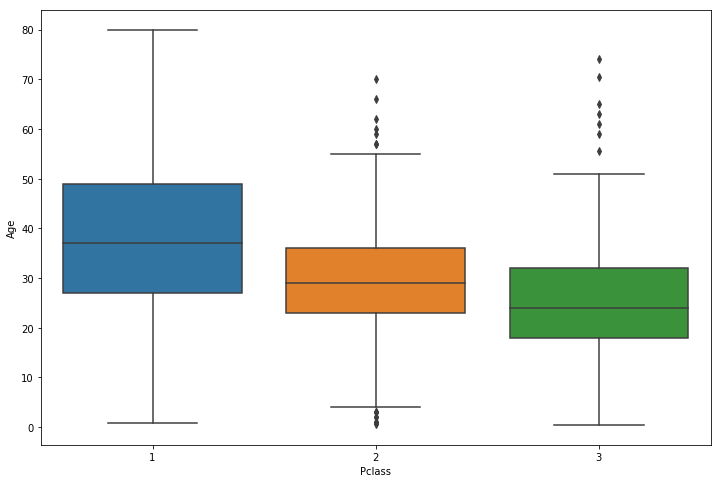

In [67]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass', y='Age', data=train)

We can see the average for people inn Pclass 1 is 37 for Pclass 2 is 29 for Pclass 3 it is 24.
We will create a function impute to get the data imputed

In [68]:
def impute(cols):
    Age=cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else: 
        return Age
        

In [69]:
train['Age'] = train[['Age','Pclass']].apply(impute,axis=1)

Now its time to see the dataset again in heatmap 

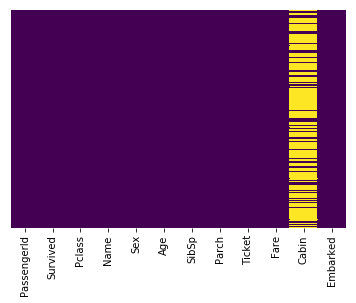

In [70]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis', cbar=False)

We see that now only the cabin class is filled with empty feature. And we will drop this feature

In [71]:
train.drop('Cabin',axis=1,inplace=True)

In [73]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Now we need to convert the categorical features in dummy variables to put them into the logistic regressin models

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [75]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [77]:
# Lets drop some unuseful features
train.drop(['Sex','Embarked','Name','Ticket'], axis=1,inplace=True)

In [78]:
train = pd.concat([train,sex,embark],axis=1)

In [79]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [80]:
type(train['male'][0])

numpy.uint8

In [86]:
train['male']=train['male'].astype('float64')
train['Q'] = train['Q'].astype('float64')
train['S'] = train['S'].astype('float64')

Great our data is ready, now let's do it with logistic model

## Building a logisitc regression model

### Train test split

In [87]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.3, random_state=101)

### Training and predicting

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [91]:
# Predictions
pred = model.predict(x_test)

### Time to evaluate our model

In [92]:
from sklearn.metrics import classification_report

In [93]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.77      0.88      0.82       154
          1       0.79      0.64      0.71       114

avg / total       0.78      0.78      0.77       268

